# Домашнее задание по визуализации

***Автор --- Ракитин Виталий, BD-11***

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# №1
Нарисуйте графики, показывающий количество браков и разводов на душу населения в США за период с 2000 года по 2014. Отобразите легенду, подпишите оси.

In [2]:
us_marriage_divorce = pd.read_csv('data/us-marriages-divorces-1867-2014.csv')
us_marriage_divorce.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [3]:
us_marriage_divorce.Year.max()

2011

Мы не имеем статистики за 2012-2014 года. Это видно из того, что максимальное значение Year = 2011.

Поэтому будем строить графики за период с 2000 по 2014 года.

In [4]:
years_2000_2011 = range(2000,2012)
us_marriage_divorce_2000_2011 = us_marriage_divorce[us_marriage_divorce["Year"].isin(years_2000_2011)]
x1 = us_marriage_divorce_2000_2011.Marriages/us_marriage_divorce_2000_2011.Population
x2 = us_marriage_divorce_2000_2011.Divorces/us_marriage_divorce_2000_2011.Population

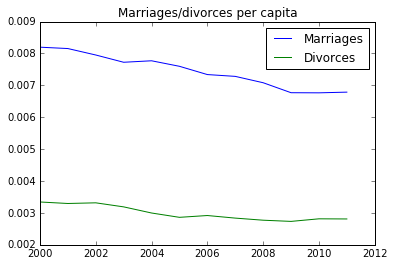

In [5]:
plt.figure()
plt.plot(years_2000_2011, x1)
plt.plot(years_2000_2011, x2)
plt.legend(["Marriages","Divorces"])
plt.title("Marriages/divorces per capita")

#### №2
Используя subplot, повторить тоже самое, что и в прошлом задании, но зависимости построить на разных графиках, одну под другой.

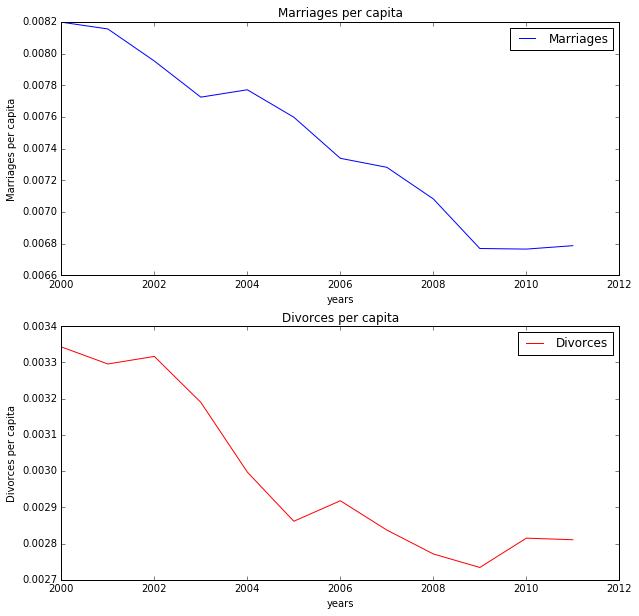

In [6]:
def myplot(x,y,color="blue",title=None,legend=None):
    plt.plot(x, y,c = color)
    plt.legend(legend)
    plt.xlabel('years')
    plt.ylabel(title)
    plt.title(title)

plt.figure(figsize=(10, 10))
plt.subplot(2,1, 1)
myplot(years_2000_2011,x1,"blue","Marriages per capita",["Marriages"])

plt.subplot(2,1, 2)
myplot(years_2000_2011,x2,"red","Divorces per capita",["Divorces"])

# №3
Постройте вертикальную столбчатую диаграмму, сравнивающую количество браков и разводов на душу населения в США в 1900, 1950, 2000 годах.

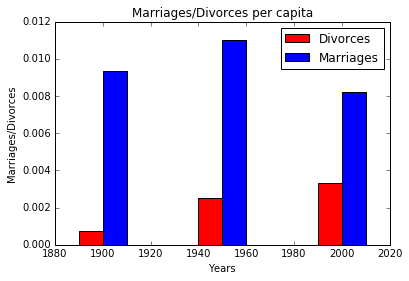

In [7]:
def myplotbar(x,y,color = "blue",bias = 5, width = 10, label = None):
    plt.bar(x + bias , y,
            color=color,
            width=width,
            align='center',
            label=label)


years = np.array([1900, 1950, 2000])
data_in_years = us_marriage_divorce[us_marriage_divorce["Year"].isin(years)]
values_Divorces = np.array(data_in_years.Divorces/data_in_years.Population)
values_Marriages = np.array(data_in_years.Marriages/data_in_years.Population)
myplotbar(years,values_Divorces,"red",-5,10,"Divorces")
myplotbar(years,values_Marriages,"blue",5,10,"Marriages")
plt.legend(loc = "upper right")
plt.title("Marriages/Divorces per capita")

plt.xlabel("Years")
plt.ylabel("Marriages/Divorces")

plt.figure()


# №4
Постройте горизонтальную столбчатую диаграмму, сравнивающую количество убийств, совершенных актером в кинофильмах.

In [8]:
actor_kills = pd.read_csv('data/actor_kill_counts.csv')
actor_kills.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


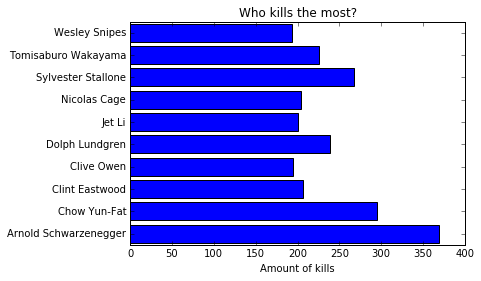

In [9]:
pos = np.array(range(len(actor_kills.Actor)))+.5     
plt.barh(pos,actor_kills.Count, align='center')
plt.yticks(pos, actor_kills.Actor)
plt.xlabel('Amount of kills')
plt.title('Who kills the most?')

#  №5
Постройте точечный график, показывающий зависимость между количеством выданных докторских степеней в Computer Science и общей выручкой от продаж компьютерных игр.

In [10]:
arcade_revenue_vs_cs_doctorates = pd.read_csv('data/arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue_vs_cs_doctorates.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


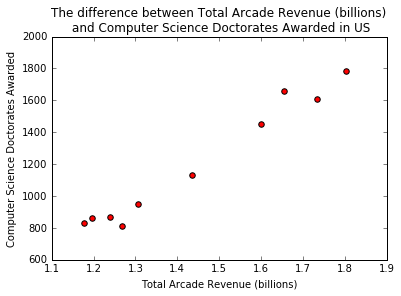

In [11]:
plt.figure()
plt.scatter( arcade_revenue_vs_cs_doctorates["Total Arcade Revenue (billions)"], 
             arcade_revenue_vs_cs_doctorates["Computer Science Doctorates Awarded (US)"],
             c='red',
             s=30,
             edgecolor='black')
plt.title("The difference between Total Arcade Revenue (billions)\n and Computer Science Doctorates Awarded in US")
plt.xlabel("Total Arcade Revenue (billions)")
plt.ylabel("Computer Science Doctorates Awarded")

# №6
Нарисуйте круговую диаграмму, показывающую соотношение способов умереть среди римских императоров.

In [12]:
roman_emperors = pd.read_csv('data/roman-emperor-reigns.csv')
roman_emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


([<matplotlib.patches.Wedge at 0x1153e8890>,
  <matplotlib.text.Text at 0x115456890>])

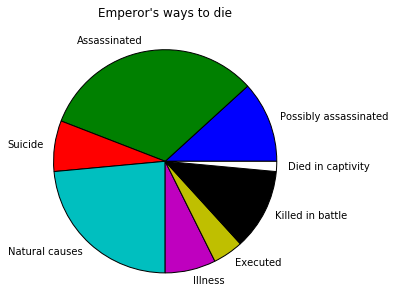

In [13]:
plt.figure(figsize=(5, 5))
death_reasons = [] 
death_reason_amounts = []
for reason in roman_emperors.Cause_of_Death:
    if reason not in death_reasons:
        death_reasons.append(reason)
        death_reason_amounts.append(1)
    else:
        death_reason_amounts[death_reasons.index(reason)] += 1


plt.title("Emperor's ways to die")
plt.pie(death_reason_amounts,labels = death_reasons)

# №7
Нарисуйте гистограмму, описывающую распределение времени правления среди убитых императоров и среди всех.

In [14]:
assassinated_emperors = roman_emperors[roman_emperors["Cause_of_Death"].isin(["Assassinated"])].Length_of_Reign.tolist()
all_emperors = roman_emperors.Length_of_Reign.tolist()

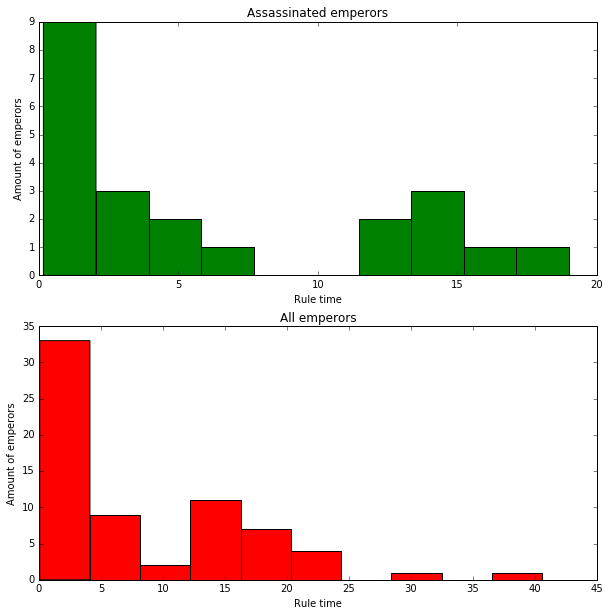

In [15]:
plt.figure(figsize=(10,10))

plt.subplot(2,1, 1)
plt.hist(assassinated_emperors,color = "green")
plt.title("Assassinated emperors")
plt.xlabel("Rule time")
plt.ylabel("Amount of emperors")

plt.subplot(2,1, 2)
plt.title("All emperors")
plt.hist(all_emperors,color = "red")
plt.xlabel("Rule time")
plt.ylabel("Amount of emperors")